In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import random, time

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features.
y = iris.target  #now our y is three classes thus require multinomial

# print(X.shape)
# print(y.shape)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Intiially tried to split X and y but not randomly (didnt work)
'''
test_size=0.3 

X_train = X[:int((1-test_size)*X.shape[0])]
X_test = X[int((1-test_size)*X.shape[0]):]
y_train = y[:int((1-test_size)*y.shape[0])]
y_test = y[int((1-test_size)*y.shape[0]):]
'''

# random train/test splitting
test_size=0.3 
list_of_m = np.arange(0,X.shape[0],1)
np.random.shuffle(list_of_m)
random_train = list_of_m[0:int((1-test_size)*X.shape[0])]
random_test = list_of_m[len(random_train):len(list_of_m)]

X_train = X[random_train]
X_test = X[random_test]
y_train = y[random_train]
y_test = y[random_test]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

k = len(np.unique(y))
m = X_train.shape[0]
n = X_train.shape[1]
Y_train_encoded = np.zeros((m, k))
# print("Y_train encoded shape:",Y_train_encoded.shape)
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

# print(Y_train_encoded)

(105, 2)
(45, 2)
(105,)
(45,)


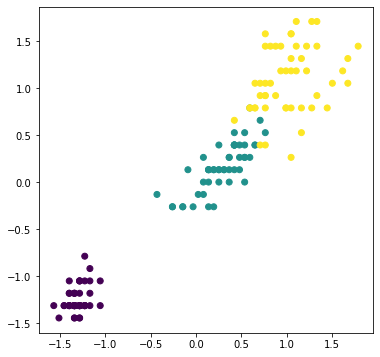

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
plt.show()

In [25]:
class LogisticRegression:
    def __init__(self, alpha=0.001, max_iter=1000, method="batch"):
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        
    def logistic_regression_GD(self, X, Y):
        self.W = np.random.rand(X.shape[1], Y.shape[1])
        self.losses = []
        # Calculate time taken
        start_time = time.time()
        
        if self.method == "batch":
            print("BATCH METHOD")
            for i in range(self.max_iter):
                cost, grad = self.gradient(X, Y)
                self.losses.append(cost)
                self.W = self.W - self.alpha*grad  
                if i % 1000 == 0:
                    print(f"Cost at iteration {i}", cost)
            print("Final thetas:\n", self.W, " at iteration:", i)
            print("Time taken:", time.time()-start_time,"s")
            
        elif self.method == "sto":
            print("STO METHOD")
            sampled = []
            for i in range(self.max_iter):
                random_sample = random.randint(0, len(X))
                while random_sample in sampled:
                    random_sample = random.randint(0, len(X))
                if len(sampled) >= len(X):
                    sampled = []
                else:
                    sampled.append(random_sample)
                X_train_sample = X[random_sample-1, :].reshape(1,-1)
                Y_train_sample = Y[random_sample-1]
                cost, grad = self.gradient(X_train_sample, Y_train_sample)
                self.losses.append(cost)
                self.W = self.W - self.alpha*grad
                if i % 1000 == 0:
                    print(f"Cost at iteration {i}", cost)
            print("Final thetas:\n", self.W, " at iteration:", i)
            print("Time taken:", time.time()-start_time,"s")
            
        elif self.method == "mini":
            print("MINIBATCH METHOD")
            self.mini_batch = 10
            count = 0 
            for i in range(self.max_iter):
                X_train_batch = X[count:count+self.mini_batch]
                Y_train_batch = Y[count:count+self.mini_batch]
                count += self.mini_batch
                if count >= len(X):
                    count = 0
                cost, grad = self.gradient(X_train_batch, Y_train_batch)
                self.losses.append(cost)
                self.W = self.W - self.alpha*grad
                if i % 1000 == 0:
                    print(f"Cost at iteration {i}", cost)
            print("Final thetas:\n", self.W, " at iteration:", i)
            print("Time taken:", time.time()-start_time,"s")

        else:
            raise ValueError

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        cost = - np.sum(Y * np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Training Losses as Number of iters increases")
        plt.xlabel("Epoch")
        plt.ylabel("costs")
        plt.legend()
        
    def yhat(self, X_test):
        return np.argmax((self.h_theta(X_test, self.W)), axis=1)

BATCH METHOD
Cost at iteration 0 1.2178393384042303
Cost at iteration 1000 0.14019602031375356
Cost at iteration 2000 0.11247046060346269
Cost at iteration 3000 0.10192679866439598
Cost at iteration 4000 0.09628607955086792
Cost at iteration 5000 0.09277045562044796
Cost at iteration 6000 0.09038082333549237
Cost at iteration 7000 0.08866321232342009
Cost at iteration 8000 0.08737940480042786
Cost at iteration 9000 0.0863915674399366
Final thetas:
 [[-0.40511199  5.08173682 -2.78808389]
 [-5.09566977  0.18150582  6.68088194]
 [-3.968249   -0.09206667  6.11466653]]  at iteration: 9999
Time taken: 0.3272976875305176 s
REPORT:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.9

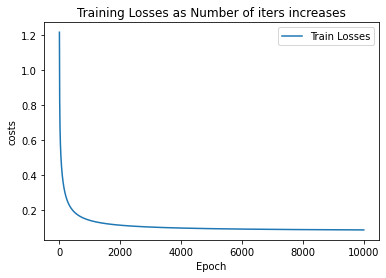

In [26]:
iris1 = LogisticRegression(alpha=0.001, max_iter=10000,method="batch")
iris1.logistic_regression_GD(X_train, Y_train_encoded)
iris1.plot()
yhat1 = iris1.yhat(X_test)
print("REPORT:", classification_report(y_test, yhat1))

STO METHOD
Cost at iteration 0 1.7868939708673683
Cost at iteration 1000 0.6343941650112978
Cost at iteration 2000 0.738733423853829
Cost at iteration 3000 0.8473607628276857
Cost at iteration 4000 0.7938608069412005
Cost at iteration 5000 0.8225613181178296
Cost at iteration 6000 0.32579557182133223
Cost at iteration 7000 0.682732131127544
Cost at iteration 8000 0.7194306429718724
Cost at iteration 9000 0.3402545691421102
Final thetas:
 [[ 0.25767164  1.3099625   0.47052457]
 [-0.63402503  0.88041842  1.44993803]
 [-0.72074327  0.3810104   1.43053688]]  at iteration: 9999
Time taken: 0.32681918144226074 s
REPORT:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        4

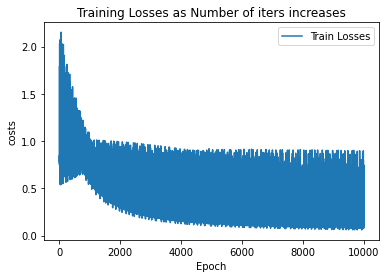

In [27]:
iris2 = LogisticRegression(alpha=0.001, max_iter=10000,method="sto")
iris2.logistic_regression_GD(X_train, Y_train_encoded)
iris2.plot()
yhat2 = iris2.yhat(X_test)
print("REPORT:", classification_report(y_test, yhat2))

MINIBATCH METHOD
Cost at iteration 0 0.9023442895369378
Cost at iteration 1000 0.38157782574942106
Cost at iteration 2000 0.2964576151730155
Cost at iteration 3000 0.24472961269163487
Cost at iteration 4000 0.1475474443938008
Cost at iteration 5000 0.2977309388075008
Cost at iteration 6000 0.11415526679807989
Cost at iteration 7000 0.12872714715842676
Cost at iteration 8000 0.18561798460151296
Cost at iteration 9000 0.22047976207213166
Final thetas:
 [[-0.59544521  2.33882974 -1.21723663]
 [-2.12709568  1.17563556  3.24884537]
 [-2.05574448 -0.08027562  3.68767864]]  at iteration: 9999
Time taken: 0.24489212036132812 s
REPORT:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      

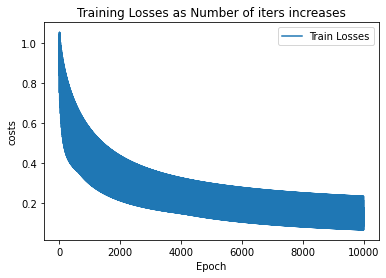

In [28]:
iris3 = LogisticRegression(alpha=0.001, max_iter=10000, method="mini")
iris3.logistic_regression_GD(X_train, Y_train_encoded)
iris3.plot()
yhat3 = iris3.yhat(X_test)
print("REPORT:", classification_report(y_test, yhat3))

In [29]:
iris4 = LogisticRegression(alpha=0.001, max_iter=10000, method="blah blah")
iris4.logistic_regression_GD(X_train, Y_train_encoded)

ValueError: 

------------ Discussion -------------

In terms of time taken, the batch method always takes the longest time to compute. This is because batch simply utilizes the entire training set and thus, has to run through a lot of data for just one iteration. Normally, the stochastic method would take the shortest time to run but in the case of my code, minibatch was executed the fastest. This is likely because of the extra time required to generate a random variable in the range of len(X) for the stochastic method for each iteration. 

The batch method leads to the lowest value for training losses, at just 0.086 by the 9000th iteration, again, this is because it uses the most data in the training process. Conversely, the stochastic method has the worst convergence and only reaches 0.34 by the 9000th iteration with major fluctuations throughout. The minibatch method has a good convergence but tends to fluctuate after reaching a certain point.